<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Sophie Andira Cindani Gardian"
KELAS = "C"
NPM = "2006597443"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ['https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489', 'https://towardsdatascience.com/a-practical-introduction-to-hierarchical-clustering-from-scikit-learn-ffaf8ee2670c', 'https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad', 'https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a', 'https://www.youtube.com/watch?v=fl0PH6uQDIw', 'https://www.youtube.com/watch?v=v7oLMvcxgFY', 'https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster', 'https://stackoverflow.com/questions/50695226/how-to-get-the-optimal-number-of-clusters-using-hierarchical-cluster-analysis-au', 'https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data', 'https://joydipnath.medium.com/clustering-technique-for-categorical-data-in-python-8eb0f581b6f9', 'https://stackoverflow.com/questions/64604248/why-does-kmeans-give-exactly-the-same-results-everytime', 'https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/'],

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sophie Andira Cindani Gardian dari kelas C dengan NPM 2006597443, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sophie Andira Cindani Gardian)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan.

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [ ]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

#tambahan modul
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [ ]:
penguin = pd.read_csv('penguin.csv')
penguin.head()

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [ ]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [ ]:
penguin.describe(include='all')

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
count,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,NaN,NaN,NaN,NaN,3
top,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,168,NaN,NaN,NaN,NaN,168
mean,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


4. Lakukan penanganan terhadap *missing values* [2]

In [ ]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(penguin)

                    Total   Percent
jenis_kelamin          10  0.029070
panjang_paruh_atas      2  0.005814
tebal_paruh_atas        2  0.005814
panjang_sirip           2  0.005814
massa_tubuh             2  0.005814


Karena persentase missing values tidak besar, maka saya akan menghapus baris yang terdapat missing values di dalamnya

In [ ]:
penguin_cleaned = penguin.copy()
penguin_cleaned.dropna(inplace=True)

In [ ]:
cek_null(penguin_cleaned)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Bisa dilihat pada hasil di atas, sekarang sudah tidak ada null value lagi

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


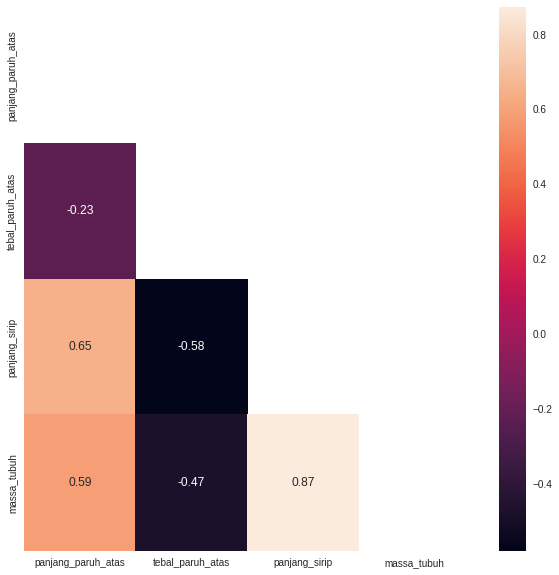

In [ ]:
mask = np.triu(np.ones_like(penguin_cleaned.corr(), dtype=np.bool)) #agar tidak ada redundansi
plt.figure(figsize=(10,10))
sns.heatmap(penguin_cleaned.corr(method='pearson'), annot=True, mask = mask)

Hasil di atas adalah nilai pearson r untuk keterhubungan linearitas antar atribut

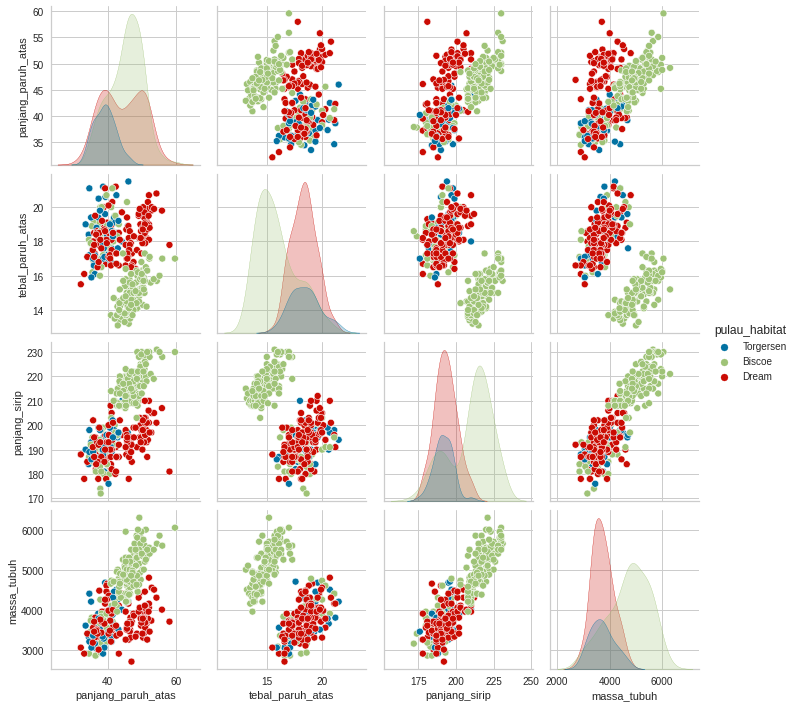

In [ ]:
sns.pairplot(penguin_cleaned, hue='pulau_habitat')

Hasil di atas merupakan scatter plot untuk keterhubungan linearitas antar atribut yang dibagi berdasarkan pulau_habitat

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

Saya memilih atribut massa_tubuh dan panjang_sirip. Hal tersebut karena dapat dilihat pada heatmap dan pairplot di atas bahwa korelasinya cukup tinggi. Oleh karena itu, saya ingin lebih memastikan dan meyakinkan pendistribusian kedua atribut tersebut terhadap satu sama lain karena kemungkinan besar hasil clustering bernilai baik

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut:
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

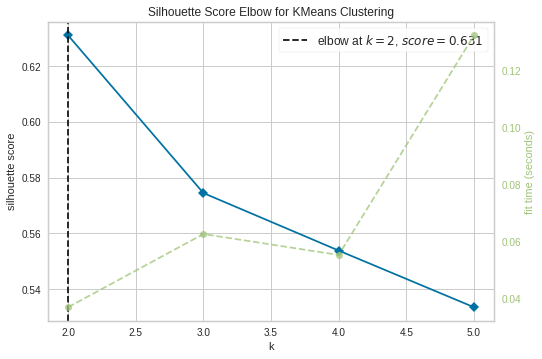

In [ ]:
modeltes = KMeans()
# K merupakan range nilai silhoutte analysis. Pada soal tertulis bahwa rangenya adalah 2 <=K<=6
data = pd.DataFrame(penguin_cleaned, columns=['massa_tubuh', 'panjang_sirip'])
visualizer = KElbowVisualizer(modeltes, k=(2,6),metric='silhouette', timings= True)
visualizer.fit(data)
visualizer.show()

Pada visualisasi di atas, terlihat pada pojok kanan bahwa nilai K yang paling optimal adalah 2 dengan score = 0.631 (score yang paling tinggi). Rumus silhoutte analysis sendiri adalah (b-a)/max(a,b) di mana a adalah rata-rata intra cluster distance dan b adalah rata-rata nearest cluster distance

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [ ]:
kmeans = KMeans(n_clusters=2)
X_std = StandardScaler().fit_transform(data) #menstadardisasi data menggunakan standardization
points = kmeans.fit_predict(X_std)
centroids = kmeans.cluster_centers_

#centroids merupakan titik tengah pada masing-masing cluster

9. Visualisasikan klaster yang ada [5]

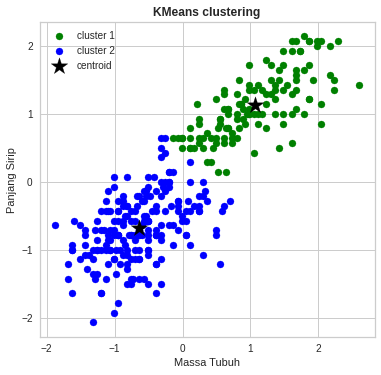

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[points == 0, 0], X_std[points == 0, 1], color='green', label='cluster 1')
plt.scatter(X_std[points == 1, 0], X_std[points == 1, 1], color='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, color='black', label='centroid')

plt.legend()
plt.xlabel('Massa Tubuh')
plt.ylabel('Panjang Sirip')
plt.title('KMeans clustering', fontweight='bold')
ax.set_aspect('equal');

10. Berikan interpretasi dari klaster yang dihasilkan [5]

Dari klaster yang dihasilkan di atas, dapat dilihat bahwa penguin yang memiliki masa tubuh yang rendah cenderung memiliki panjang sirip yang pendek (klaster warna biru) sedangkan penguin yang memiliki masa tubuh yang tinggi cenderung memiliki panjang sirip yang panjang (klaster warna hijau)

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini.

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [ ]:
model = AgglomerativeClustering(linkage="ward")
model.fit(X_std)
labels = model.labels_

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

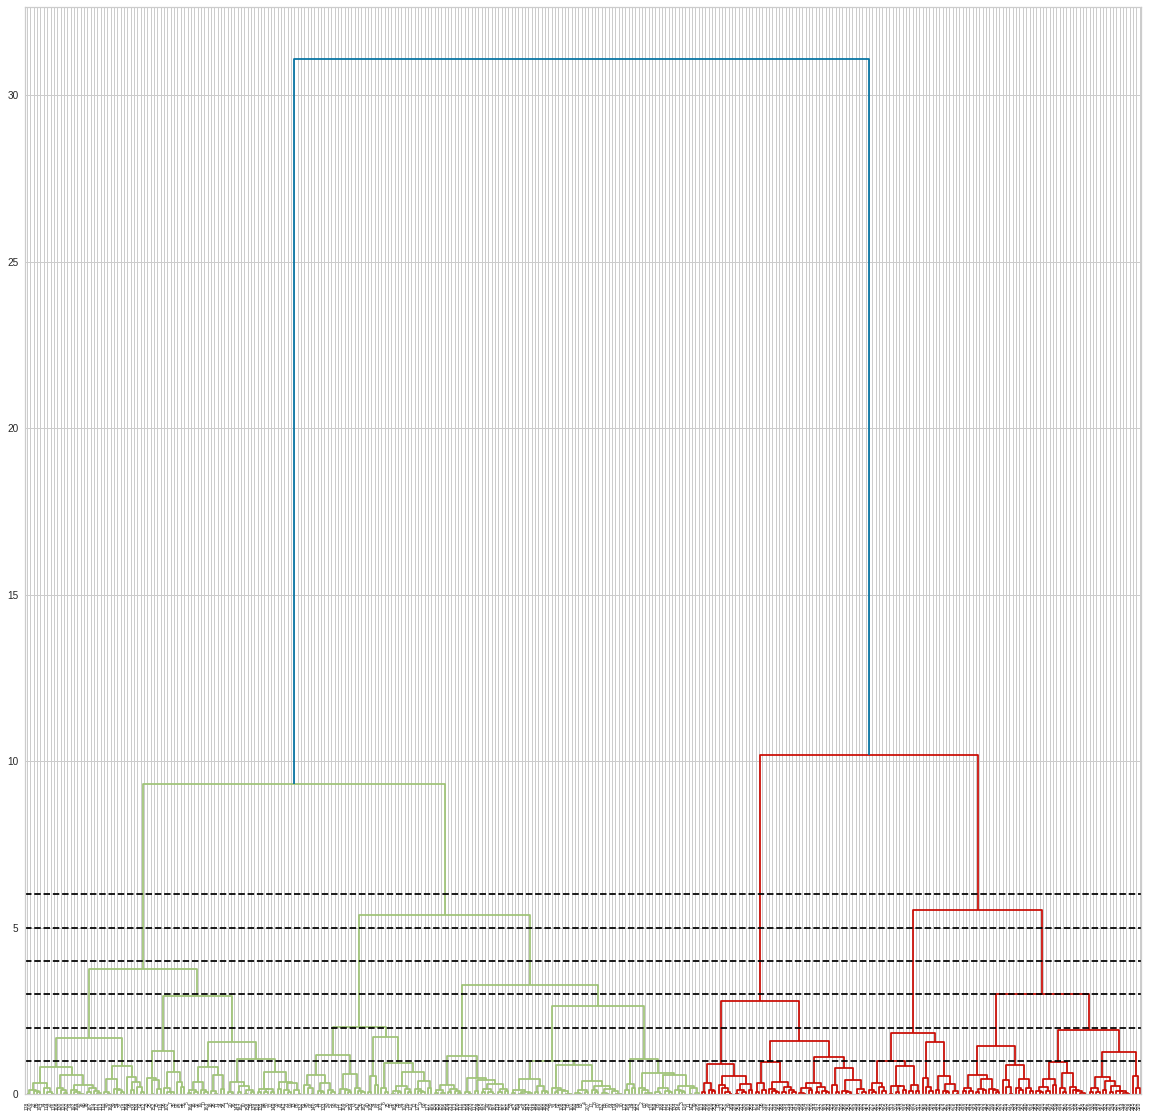

In [ ]:
plt.figure(figsize=(20, 20))
dendrogram = shc.dendrogram(shc.linkage(X_std, method = 'ward'))
plt.axhline(6, color='black', linestyle='--')
plt.axhline(5, color='black', linestyle='--')
plt.axhline(4, color='black', linestyle='--')
plt.axhline(3, color='black', linestyle='--')
plt.axhline(2, color='black', linestyle='--')
plt.axhline(1, color='black', linestyle='--')

Menentukan berapa jumlah cluster yang tepat dari dendogram dapat menggunakan bantuan garis-garis buatan seperti di atas. Garis yang memiliki perbedaan ketinggian terbesar dengan node dan sudah melewati garis horizontal pada dendrogram merupakan jumlah cluster yang paling optimal. Dapat dilihat pada dendrogram di atas, garis kedua memiliki sifat-sifat tersebut. Oleh karena itu, 2 merupakan banyaknya cluster yang paling optimal. Jumlah cluster optimal tersebut sama dengan K-Means yang sudah kita hitung sebelumnya

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [ ]:
model2 = AgglomerativeClustering(linkage="ward", n_clusters=2)
model2.fit(X_std)
labels2 = model2.labels_

14. Visualisasikan hasil *clustering assignment* [4]

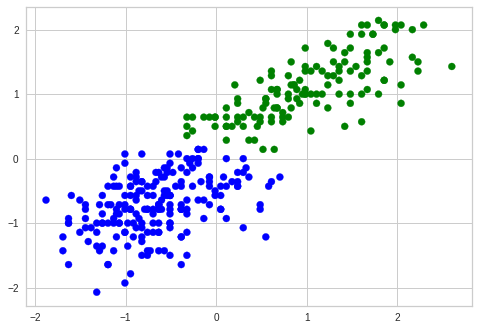

In [ ]:
LABEL_COLOR_MAP = {0 : 'green', 1 : 'blue'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(X_std[:, 0], X_std[:, 1], c=label_color)

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

## Jawaban:

15. Categorical feature dapat dilakukan clustering melalui K-modes. Analisis K-modes ini merupakan modifikasi dari K-means. Beberapa tahapan dari K-modes ini antara lain dengan menghitung frekuensi semua kategori untuk semua atribut dan simpan dalam array dalam urutan descending. Kemudian, tetapkan kategori yang paling banyak sesuai dengan banyaknya K-modes. Lalu, dari isi array yang paling awal, pilih data yang paling mirip dengan Q1 (bagian array paling awal) dan ganti Q1 dengan data sebagai mode awal. Lakukan sampai seluruh isi array. (untuk penjelasan yang lebih jelas, dapat dilihat pada bagian referensi terkait K-modes). Selain itu, untuk melakukan clustering yang datanya mengandung campuran categorical dan numeric, kita dalam menggunakan k-prototypes. K-prototypes menggunakan jarak Hamming untuk fitur kategoris dan jarak Euclidean untuk fitur numerik. Kita juga bisa menggunakan encoder yang digunakan oleh library sebelum memulai clustering

16. Centroid adalah lokasi imajiner atau lokasi sesungguhnya yang mewakili pusat dari masing-masing cluster. Dalam K-means, terdapat perhitungan antara centroid dengan data yang paling dekat dengan centroid tersebut. Data-data yang dekat ini akan dimasukkan ke dalam cluster yang sama. Data yang globular memiliki bentuk yang cenderung seperti lingkaran sehingga perhitungan data yang dekat dengan centroid ini akan menjadi susah untuk dilakukan sehingga penerapan k-means kurang cocok.

17. K-means dari sklearn akan memberikan hasil yang sangat similar tiap kali dijalankan. K-means adalah algoritma yang memanfaatkan pemindahan centroid secara iteratif yang nantinya akan terbentuk cluster dari cara tersebut. Titik centroids sebagai titik pemulaian proses ini biasanya diambil secara acak. Dengan cara random ini, k-means bisa saja menghasilkan hasil yang berbeda. Namun perbedaan hasil ini biasanya sangat kecil malah cenderung hasilnya tidak berbeda

18. Intra-cluster similarity adalah jarak antara data yang ada dalam suatu cluster sedangkan inter-cluster similarity adalah jarak data yang tidadak berada dalam cluster yang sama. Cara menghitung intra-cluster similarity yang pertama adalah menghitung complete diameter distance (jarak antara dua data paling jauh yang termasuk dalam cluster yang sama), kemudian menghitung average diameter distance (jarak rata-rata antara semua data yang termasuk dalam cluster yang sama), lalu terakhir menghitung centroid diamter distance (dua kali jarak rata-rata antara semua data dan pusat cluster). Sementara itu, cara menghitung inter-cluster similarity yang pertama adalah mengitung single linkage distance (jarak terdekat antara dua data milik dua cluster yang berbeda), kemudian menghitung complete linkage distance (jarak antara dua data paling jauh yang termasuk dalam dua cluster yang berbeda), lalu menghitung average linkage distance (jarak rata-rata antara semua data yang termasuk dalam dua cluster berbeda yang ditentukan), setelah itu menghitung centroid linkage distance (jarak antara masing-masing centroid dari dua cluster yang berbeda), lalu terakhir menghitung average centroid linkage distance (jarak antara pusat cluster dan semua data yang tergabung dalam cluster yang berbeda). Sebuah cluster dianggap baik apabila ia memiliki nilai inter-cluster similarity yang rendah dan nilai intra-cluster similarity tinggi